# Метрические методы классификации

## Библиотеки

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


## Выборка данных

In [10]:
df = pd.read_csv('adultdataset/adult.csv',',')
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
del df['fnlwgt']
del df['marital-status']
del df['education-num']
del df['occupation']
del df['relationship']
del df['race']
del df['sex']
del df['capital-gain']
del df['capital-loss']
del df['native-country']

## Обработка данных

In [17]:
#Преобразование категориальных признаков в числовые
le = LabelEncoder()
le.fit(df.workclass)
df['workclass'] = le.transform(df.workclass)
df.head(50)
# df.workclass.unique()
# df.workclass = pd.get_dummies(df.workclass)
# df.education = pd.get_dummies(df.education)
# # Матричная диаграмма рассеивания
# sns.set_style("whitegrid")
# sns.pairplot(df, hue="income", height=3)
# plt.show()

,age,workclass,education,hours-per-week,income
0,50,1,Bachelors,13,<=50K
1,38,1,HS-grad,40,<=50K
2,53,1,11th,40,<=50K
3,28,1,Bachelors,40,<=50K
4,37,1,Masters,40,<=50K
5,49,1,9th,16,<=50K
6,52,1,HS-grad,45,>50K
7,31,1,Masters,50,>50K
8,42,1,Bachelors,40,>50K
9,37,1,Some-college,80,>50K


## Обработка отсутствующих данных

age - 0%
workclass - 0%
education - 0%
hours-per-week - 0%
income - 0%


<AxesSubplot:>

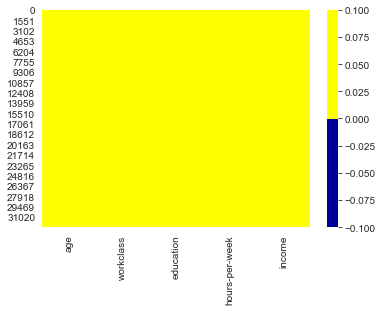

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()*100)
    print('{} - {}%'.format(col, round(pct_missing)))
cols = df.columns # первые 30 колонок
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
num_features = 4
X, Y = make_classification(n_samples=150, n_features=num_features,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=50,
                                                    random_state=0)
X = df.values[:, :3]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)



## Метод ближайшего соседа

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, num_features*2)

ax = []
for i in range(num_features):
    ax.append(fig.add_subplot(gs[i]))
value=1.0
width=0.75
plot_decision_regions(X_train, Y_train, model, ax=ax[0],
                       filler_feature_values={2: value, 3:value},
                  filler_feature_ranges={2: width, 3:width},
                  legend=2)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Workclass')
print("Правильность на обучающей выборке : {:.2f}".format(model.score(X_train,Y_train)))
plot_decision_regions(X_test, Y_test, model, ax=ax[1],
                       filler_feature_values={2: value, 3:value},
                  filler_feature_ranges={2: width, 3:width},
                  legend=2)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Workclass')
print("Правильность на контрольной выборке : {:.2f}".format(model.score(X_test,Y_test)))



## Метод k-ближайших соседей

In [ ]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод k-ближайших соседей с линейно убивающими весами

In [ ]:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

In [ ]:
models = []
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, 
                                 weights=func)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод окна Парзена

In [ ]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 5.0]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()